Statistics getting for the webpage: https://www.regionalstatistik.de/

Section: Agricultural data and crops

In [1]:
import pandas as pd
import numpy as np #Librería para realizar operaciones con matrices.
import matplotlib.pyplot as plt
import seaborn as sns 
import math    #Librería para operaciones matematicas simples.
import matplotlib.ticker as ticker #Librería para ajustar los ejes de las gráficas
from sklearn.linear_model import LinearRegression  # Librería para hacer las regresiones lineales
import statsmodels.api as sm #Para realizar los modelos Lowess
from scipy import stats
from scipy import optimize
sns.set()
plt.style.use('seaborn-white')
%matplotlib inline 
import os

In [2]:
fn = 'C:/Users/Usuario/Documents/codigos/Thesis/Thesis/estadisticas_alemania/estadistica1_germany.csv' 

df = pd.read_csv(fn,encoding='utf-8', sep=',')
df.info()
df.shape #Para saber el tamaño del DataFrame
df.head(10) # que python imprima en pantalla las primeras 10 lineas de la tabla

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   year                    3 non-null      int64
 1   Total farmland          3 non-null      int64
 2   Cereals                 3 non-null      int64
 3   Wheat                   3 non-null      int64
 4   Winter wheat            3 non-null      int64
 5   Rye and winter cereals  3 non-null      int64
 6   Triticale               3 non-null      int64
 7   Barley                  3 non-null      int64
 8   Oats                    3 non-null      int64
 9   Grain maize             3 non-null      int64
 10  Other cereals           3 non-null      int64
 11  Green harvest plants    3 non-null      int64
 12  Silage/green maize      3 non-null      int64
 13  Sugar beets             3 non-null      int64
 14  Potato                  3 non-null      int64
 15  Oil Crops               3 n

,year,Total farmland,Cereals,Wheat,Winter wheat,Rye and winter cereals,Triticale,Barley,Oats,Grain maize,Other cereals,Green harvest plants,Silage/green maize,Sugar beets,Potato,Oil Crops,Winter rape,Legumes
0,2020,11663811,6074865,2835511,2758732,635962,341296,1667310,157076,419297,18413,3093435,2299741,385959,273499,997430,954351,223947
1,2016,11763002,6325023,3201699,3131167,570902,396092,1604997,115538,416336,19460,2790499,2137607,334485,242519,1351723,1322681,187096
2,2010,11846665,6595447,3297699,3233926,627112,397517,1641322,141433,466591,23773,2570973,1828904,364120,254367,1502269,1457331,100651


In [3]:
df.set_index(df['year'], inplace = True)
df.pop('year')

df

,Total farmland,Cereals,Wheat,Winter wheat,Rye and winter cereals,Triticale,Barley,Oats,Grain maize,Other cereals,Green harvest plants,Silage/green maize,Sugar beets,Potato,Oil Crops,Winter rape,Legumes
year,,,,,,,,,,,,,,,,,
2020,11663811,6074865,2835511,2758732,635962,341296,1667310,157076,419297,18413,3093435,2299741,385959,273499,997430,954351,223947
2016,11763002,6325023,3201699,3131167,570902,396092,1604997,115538,416336,19460,2790499,2137607,334485,242519,1351723,1322681,187096
2010,11846665,6595447,3297699,3233926,627112,397517,1641322,141433,466591,23773,2570973,1828904,364120,254367,1502269,1457331,100651


In [4]:
df2=df.T
df2

year,2020,2016,2010
Total farmland,11663811,11763002,11846665
Cereals,6074865,6325023,6595447
Wheat,2835511,3201699,3297699
Winter wheat,2758732,3131167,3233926
Rye and winter cereals,635962,570902,627112
Triticale,341296,396092,397517
Barley,1667310,1604997,1641322
Oats,157076,115538,141433
Grain maize,419297,416336,466591
Other cereals,18413,19460,23773


In [5]:
df2.columns.values[0]

2020

In [6]:
df3=df2.sort_values(by=df2.columns.values[0], ascending=False)

In [7]:
df3=df3[3:]
df3

year,2020,2016,2010
Wheat,2835511,3201699,3297699
Winter wheat,2758732,3131167,3233926
Silage/green maize,2299741,2137607,1828904
Barley,1667310,1604997,1641322
Oil Crops,997430,1351723,1502269
Winter rape,954351,1322681,1457331
Rye and winter cereals,635962,570902,627112
Grain maize,419297,416336,466591
Sugar beets,385959,334485,364120
Triticale,341296,396092,397517


In [8]:
df3=df3.sort_values(by=2020, ascending=True)

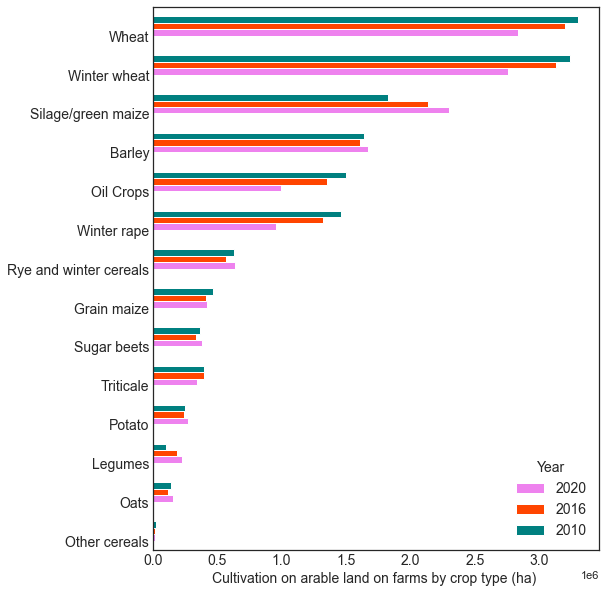

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 10))
df3.plot.barh(rot=0, ax=ax, fontsize=14, position=0, 
              color={df2.columns.values[0]: 'violet',
                     df2.columns.values[1]: 'orangered',
                     df2.columns.values[2]:'teal'})
ax.set_xlabel('Cultivation on arable land on farms by crop type (ha) ', fontsize=14)
ax.legend(title= 'Year', title_fontsize = 14,prop = {'size' : 14});
# plt.savefig("C:/Users/Flores/Documents/PythonScripts/codigos/Thesis/estadisticas_alemania/StatisticGermany_byCrops.png", dpi=500, bbox_inches="tight")

Statistic by states

In [10]:
fn2010 = 'C:/Users/Usuario/Documents/codigos/Thesis/Thesis/estadisticas_alemania/estadistica_states_germany2010.csv' 
fn2016 = 'C:/Users/Usuario/Documents/codigos/Thesis/Thesis/estadisticas_alemania/estadistica_states_germany2016.csv'
fn2020 = 'C:/Users/Usuario/Documents/codigos/Thesis/Thesis/estadisticas_alemania/estadistica_states_germany2020.csv'


df2010 = pd.read_csv(fn2010,encoding='cp1252', sep=',', index_col='States')
df2016 = pd.read_csv(fn2016,encoding='cp1252', sep=',', index_col='States')
df2020 = pd.read_csv(fn2020,encoding='cp1252', sep=',', index_col='States')

In [11]:
df2010

,Total farmland,Cereals,Wheat,Winter wheat,Rye and winter cereals,Triticale,Barley,Oats,Grain maize,Other cereals,Green harvest plants,Silage/green maize,Sugar beets,Potato,Oil Crops,Winter rape,Legumes
States,,,,,,,,,,,,,,,,,
Schleswig-Holstein,674283,292192,207956,205876,20442,6370,51674,3864,1087,799,239668,175669,7491,5458,112158,111890,1616
Hamburg,5614,2365,.,.,274,.,424,140,-,.,1145,694,17,63,.,704,.
Niedersachsen,1863849,942180,434442,430181,120579,78985,197006,11452,98246,1472,515200,434026,97964,112594,131052,129590,3530
Bremen,1608,698,474,474,18,.,154,7,.,.,619,535,-,.,.,.,-
Nordrhein-Westfalen,1052326,644863,286770,283570,16095,57236,171408,12363,98575,2416,206773,159586,53743,31074,68835,68058,4130
Hessen,476737,303963,166717,164610,14281,17022,87193,11349,5632,1769,63825,36645,14239,4284,67114,66809,2944
Rheinland-Pfalz,401788,241216,119917,115585,11235,17114,76645,6180,8824,1302,56380,28904,18033,7581,46930,45712,1725
"Baden-Württemberg, Land",829272,529317,238467,232684,10621,21825,158453,25339,71593,3020,167138,107652,15650,5359,71151,68234,5422
Bayern,2052183,1167566,526662,519226,40377,75740,368884,32271,118604,5029,513972,376857,59367,43431,153941,148446,18454


In [12]:
df2010["Federal States"]=["Schleswig-Holstein","Hamburg","Lower Saxony","Bremen",
                          "North Rhine-Westphalia","Hasse","Rhineland-Palatinate",
                          "Baden-Württemberg","Bavaria","Saarland","Berlin","Brandenburg",
                          "Mecklenburg-Vorpommern","Saxony","Saxony-Anhalt","Thuringia"]
df2016["Federal States"]=["Schleswig-Holstein","Hamburg","Lower Saxony","Bremen",
                          "North Rhine-Westphalia","Hasse","Rhineland-Palatinate",
                          "Baden-Württemberg","Bavaria","Saarland","Berlin","Brandenburg",
                          "Mecklenburg-Vorpommern","Saxony","Saxony-Anhalt","Thuringia"]
df2020["Federal States"]=["Schleswig-Holstein","Hamburg","Lower Saxony","Bremen",
                          "North Rhine-Westphalia","Hasse","Rhineland-Palatinate",
                          "Baden-Württemberg","Bavaria","Saarland","Berlin","Brandenburg",
                          "Mecklenburg-Vorpommern","Saxony","Saxony-Anhalt","Thuringia"]

In [13]:
df2010=df2010.set_index("Federal States")
df2016=df2016.set_index("Federal States")
df2020=df2020.set_index("Federal States")

In [14]:
df2010.index.values


array(['Schleswig-Holstein', 'Hamburg', 'Lower Saxony', 'Bremen',
       'North Rhine-Westphalia', 'Hasse', 'Rhineland-Palatinate',
       'Baden-Württemberg', 'Bavaria', 'Saarland', 'Berlin',
       'Brandenburg', 'Mecklenburg-Vorpommern', 'Saxony', 'Saxony-Anhalt',
       'Thuringia'], dtype=object)

In [15]:
df_total= pd.concat([df2010['Total farmland'],df2016['Total farmland'],df2020['Total farmland']], 
                    axis=1, keys=['2010','2016','2020'])

df_total=df_total.replace('...',0)
df_total

,2010,2016,2020
Federal States,,,
Schleswig-Holstein,674283,655803,655011
Hamburg,5614,5708,5523
Lower Saxony,1863849,1887767,1866906
Bremen,1608,1641,1567
North Rhine-Westphalia,1052326,1035215,1047873
Hasse,476737,466823,464437
Rhineland-Palatinate,401788,400885,0
Baden-Württemberg,829272,819633,810280
Bavaria,2052183,2048124,2022682


In [16]:
df_total['2010'] = df_total['2010'].astype(int)
df_total['2016'] = df_total['2016'].astype(int)
df_total['2020'] = df_total['2020'].astype(int)

In [17]:
df_total=df_total.sort_values(by='2020', ascending=True)
df_total

,2010,2016,2020
Federal States,,,
Rhineland-Palatinate,401788,400885,0
Berlin,1453,1015,1073
Bremen,1608,1641,1567
Hamburg,5614,5708,5523
Saarland,37252,36626,34224
Hasse,476737,466823,464437
Thuringia,612929,609416,604086
Schleswig-Holstein,674283,655803,655011
Saxony,720739,707210,702673


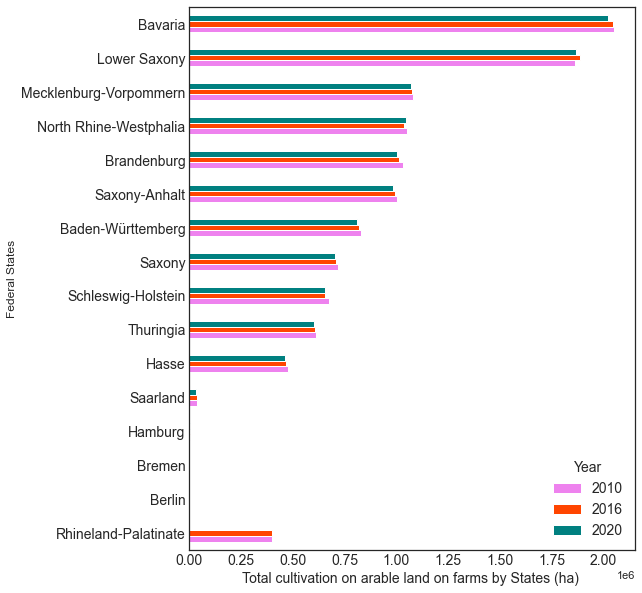

In [18]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 10))
df_total.plot.barh(rot=0, ax=ax1, fontsize=14, position=0.5, 
              color={df_total.columns.values[0]: 'violet',
                     df_total.columns.values[1]: 'orangered',
                     df_total.columns.values[2]:'teal'})
ax1.set_xlabel('Total cultivation on arable land on farms by States (ha) ', fontsize=14)
ax1.legend(title= 'Year', title_fontsize = 14,prop = {'size' : 14});
# plt.savefig("C:/Users/Usuario/Documents/codigos/Thesis/Thesis/PythonScripts/codigos/Thesis/estadisticas_alemania/StatisticTotalCrops_byStates.png", dpi=500, bbox_inches="tight")

In [19]:
df_ww= pd.concat([df2010['Winter wheat'],df2016['Winter wheat'],df2020['Winter wheat']], 
                    axis=1, keys=['2010','2016','2020'])
df_ww=df_ww.replace('.',0)
df_ww=df_ww.replace('...',0)
df_ww

,2010,2016,2020
Federal States,,,
Schleswig-Holstein,205876,183801,136455
Hamburg,0,1218,0
Lower Saxony,430181,404279,340604
Bremen,474,0,0
North Rhine-Westphalia,283570,265379,230600
Hasse,164610,159025,138419
Rhineland-Palatinate,115585,114837,0
Baden-Württemberg,232684,225214,202073
Bavaria,519226,524347,473950


In [20]:
df_ww['2010'] = df_ww['2010'].astype(int)
df_ww['2016'] = df_ww['2016'].astype(int)
df_ww['2020'] = df_ww['2020'].astype(int)

df_ww

,2010,2016,2020
Federal States,,,
Schleswig-Holstein,205876,183801,136455
Hamburg,0,1218,0
Lower Saxony,430181,404279,340604
Bremen,474,0,0
North Rhine-Westphalia,283570,265379,230600
Hasse,164610,159025,138419
Rhineland-Palatinate,115585,114837,0
Baden-Württemberg,232684,225214,202073
Bavaria,519226,524347,473950


In [21]:
df_ww=df_ww.sort_values(by='2020', ascending=True)
df_ww

,2010,2016,2020
Federal States,,,
Hamburg,0,1218,0
Bremen,474,0,0
Rhineland-Palatinate,115585,114837,0
Berlin,0,0,0
Saarland,9430,9432,6776
Schleswig-Holstein,205876,183801,136455
Hasse,164610,159025,138419
Brandenburg,156104,169279,154498
Saxony,195564,193170,180348


In [22]:
df_ww1=df_ww[df_ww['2020']>0]
df_ww1

,2010,2016,2020
Federal States,,,
Saarland,9430,9432,6776
Schleswig-Holstein,205876,183801,136455
Hasse,164610,159025,138419
Brandenburg,156104,169279,154498
Saxony,195564,193170,180348
Thuringia,228056,220806,199656
Baden-Württemberg,232684,225214,202073
North Rhine-Westphalia,283570,265379,230600
Saxony-Anhalt,343107,328861,295561


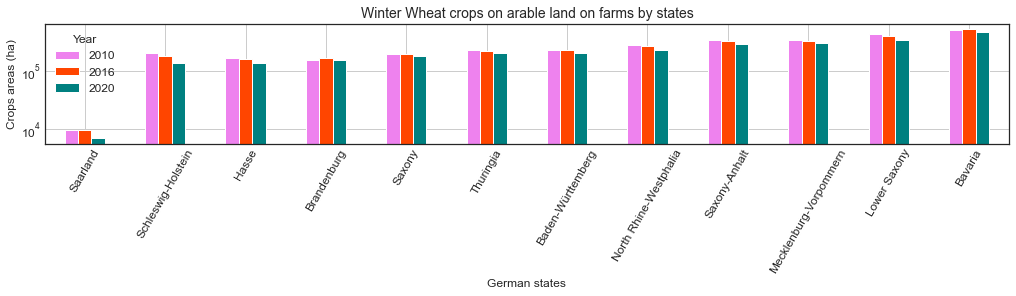

In [63]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(14, 4),constrained_layout=True)
ax1.set_title('Winter Wheat crops on arable land on farms by states', fontsize=14)
df_ww1.sort_values("2020", inplace=False)
df_ww1.plot(kind='bar',rot=60, ax=ax1, fontsize=12, position=0.5, 
              color={df_ww1.columns.values[0]: 'violet',
                     df_ww1.columns.values[1]: 'orangered',
                     df_ww1.columns.values[2]:'teal'})


ax1.legend(title= 'Year', title_fontsize = 12,prop = {'size' : 12});
ax1.set_ylabel('Crops areas (ha)', fontsize=12)
ax1.set_xlabel('German states', fontsize=12)
ax1.set_yscale('log')
ax1.grid(True)
plt.savefig("C:/Users/Usuario/Documents/codigos/Thesis/Thesis/estadisticas_alemania/Statisticww_byStates.png", dpi=500, bbox_inches="tight")

In [24]:
df_maize= pd.concat([df2010['Silage/green maize'],df2016['Silage/green maize'],df2020['Silage/green maize']], 
                    axis=1, keys=['2010','2016','2020'])

In [25]:
df_maize=df_maize.replace('.',0)
df_maize=df_maize.replace('...',0)
df_maize

,2010,2016,2020
Federal States,,,
Schleswig-Holstein,175669,165217,187112
Hamburg,694,760,949
Lower Saxony,434026,524683,543639
Bremen,535,0,0
North Rhine-Westphalia,159586,196674,214701
Hasse,36645,46343,43897
Rhineland-Palatinate,28904,33508,0
Baden-Württemberg,107652,134392,134375
Bavaria,376857,435284,433859


In [26]:
df_maize['2010'] = df_maize['2010'].astype(int)
df_maize['2016'] = df_maize['2016'].astype(int)
df_maize['2020'] = df_maize['2020'].astype(int)

df_maize

,2010,2016,2020
Federal States,,,
Schleswig-Holstein,175669,165217,187112
Hamburg,694,760,949
Lower Saxony,434026,524683,543639
Bremen,535,0,0
North Rhine-Westphalia,159586,196674,214701
Hasse,36645,46343,43897
Rhineland-Palatinate,28904,33508,0
Baden-Württemberg,107652,134392,134375
Bavaria,376857,435284,433859


In [27]:
df_maize=df_maize.sort_values(by='2020', ascending=True)
df_maize

,2010,2016,2020
Federal States,,,
Bremen,535,0,0
Rhineland-Palatinate,28904,33508,0
Berlin,56,0,0
Hamburg,694,760,949
Saarland,3569,4537,4916
Hasse,36645,46343,43897
Thuringia,49093,57778,63133
Saxony,68987,79239,93359
Baden-Württemberg,107652,134392,134375


In [28]:
df_maize1=df_maize[df_maize['2020']>0]
df_maize1

,2010,2016,2020
Federal States,,,
Hamburg,694,760,949
Saarland,3569,4537,4916
Hasse,36645,46343,43897
Thuringia,49093,57778,63133
Saxony,68987,79239,93359
Baden-Württemberg,107652,134392,134375
Saxony-Anhalt,98346,127980,159243
Mecklenburg-Vorpommern,134087,150972,171200
Schleswig-Holstein,175669,165217,187112


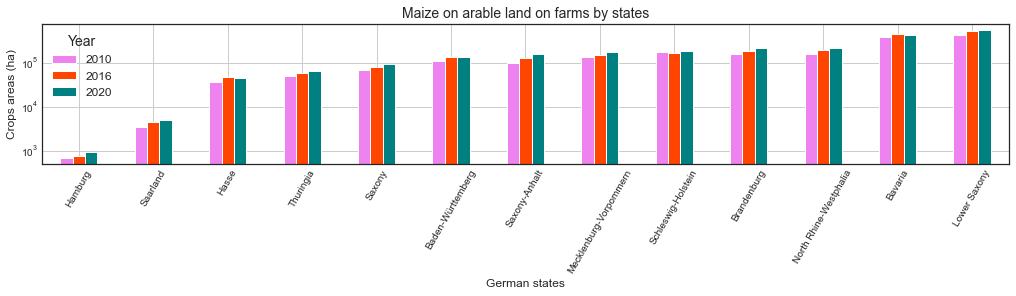

In [61]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(14, 4),constrained_layout=True)
ax1.set_title('Maize on arable land on farms by states', fontsize=14)
df_maize1.plot.bar(rot=60, ax=ax1, fontsize=10, position=0.5, 
              color={df_maize1.columns.values[0]: 'violet',
                     df_maize1.columns.values[1]: 'orangered',
                     df_maize1.columns.values[2]:'teal'})

ax1.legend(title= 'Year', title_fontsize = 14,prop = {'size' : 12});
ax1.set_ylabel('Crops areas (ha)', fontsize=12)
ax1.set_xlabel('German states', fontsize=12)
ax1.set_yscale('log')
ax1.grid(True)
plt.savefig("C:/Users/Usuario/Documents/codigos/Thesis/Thesis/estadisticas_alemania/Statisticmaize_byStates.png", dpi=500, bbox_inches="tight")

### Europa

Datos desde esta pagina: https://ec.europa.eu/eurostat/web/agriculture/data/main-tables

In [30]:
fnEU_cereals = 'C:/Users/Usuario/Documents/codigos/Thesis/Thesis/estadisticas_alemania/europa/cereal_europa.csv' 
fnEU_areas = 'C:/Users/Usuario/Documents/codigos/Thesis/Thesis/estadisticas_alemania/europa/Utilised_agricultural_area.csv'


dfEU_cereals = pd.read_csv(fnEU_cereals, sep=',', index_col='Place')
dfEU_areas = pd.read_csv(fnEU_areas, sep=',', index_col='Place')


In [31]:
dfEU_cereals=dfEU_cereals.replace(-999.0,np.nan)
dfEU_areas=dfEU_areas.replace(-999.0,np.nan)

In [32]:
dfEU_cereals=dfEU_cereals.sort_values(by='2020', ascending=False)

In [33]:
dfEU_cereals_10=dfEU_cereals[2:12]
dfEU_cereals_10

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Place,,,,,,,,,,,,
France,9200.94,9377.68,9476.27,9563.41,9584.58,9529.98,9339.87,9055.31,9394.03,8904.73,9319.49,8955.80
Poland,7803.00,7704.30,7479.50,7484.96,7511.80,7400.30,7602.00,7806.31,7891.43,7466.68,7451.27,7211.30
Germany,6500.60,6527.30,6533.70,6468.60,6529.20,6325.00,6276.20,6148.90,6380.00,6074.90,6063.50,6136.80
Spain,5985.49,6169.89,6268.03,6313.11,6195.86,6239.80,6015.23,6027.61,5975.71,6069.24,6034.58,5834.97
Romania,5224.84,5441.28,5421.80,5443.97,5471.19,5490.20,5195.50,5261.28,5572.51,5341.51,5356.95,5331.92
Italy,3145.94,3577.76,3459.87,3392.95,3269.08,3256.99,3140.58,3092.69,3066.52,3011.73,2978.39,3044.28
Hungary,2677.51,2757.93,2819.94,2817.27,2697.70,2566.76,2403.18,2367.96,2458.45,2337.65,2361.64,2372.27
Bulgaria,1768.70,1903.20,2006.99,1960.70,1835.77,1816.64,1729.27,1817.78,1927.57,1966.04,1956.33,NaN
Lithuania,1064.70,1159.70,1213.40,1288.80,1329.12,1326.70,1199.51,1257.23,1349.57,1382.43,1356.51,1350.50


In [34]:
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1.0, num=12))
# colors

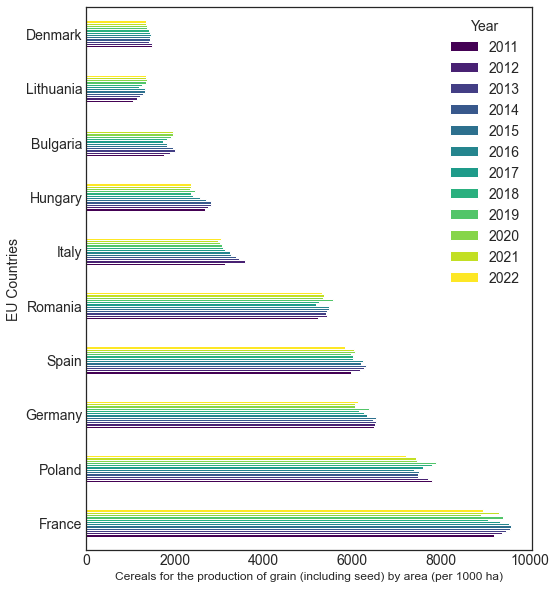

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 10))
dfEU_cereals_10.plot.barh(rot=0, ax=ax, fontsize=14, position=0.5, color=colors)
ax.set_xlabel('Cereals for the production of grain (including seed) by area (per 1000 ha)', fontsize=12)
ax.set_ylabel('EU Countries', fontsize=14)
ax.legend(title= 'Year', title_fontsize = 14,prop = {'size' : 14});
plt.savefig("C:/Users/Usuario/Documents/codigos/Thesis/Thesis/estadisticas_alemania/EU_cereals.png", dpi=500, bbox_inches="tight")

In [36]:
ax.legend?

In [37]:
dfEU_areas=dfEU_areas.sort_values(by='2019', ascending=False)


In [38]:
dfEU_areas_10=dfEU_areas[3:13]
dfEU_areas_10

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Place,,,,,,,,,,,
France,29311.03,28852.55,29000.83,29146.02,29070.82,29058.27,29101.11,29101.33,29020.16,29024.18,28897.88
Spain,23719.23,23894.37,23463.12,23494.57,23571.78,23897.14,23816.33,23840.70,24201.91,24371.66,24434.63
Germany,16704.04,16721.30,16667.30,16699.60,16724.80,16730.70,16658.90,16687.30,16645.10,16666.00,16595.00
Poland,14603.20,14780.20,14529.40,14409.90,14424.20,14398.20,14405.60,14497.60,14539.55,14550.35,14483.37
Romania,14156.48,13981.62,13733.14,13904.64,13830.42,13858.42,13520.85,13377.93,13413.74,13825.61,13048.80
Italy,12885.19,12670.20,12548.10,12426.00,12720.15,12660.89,12843.32,13005.75,12908.75,13150.20,13122.14
Hungary,5342.70,5337.23,5338.02,5339.98,5346.30,5346.45,5348.97,5352.28,5343.78,5309.52,4997.88
Greece,5425.62,5532.34,5134.71,5213.04,5406.72,5291.71,5259.70,5152.43,5288.05,5153.38,5267.52
Bulgaria,5051.86,5087.95,5122.98,4995.11,4976.82,5011.49,5021.41,5029.53,5030.28,5037.47,5047.25


In [39]:
cmap = plt.get_cmap('plasma')
colors = cmap(np.linspace(0, 1.0, num=11))
# colors

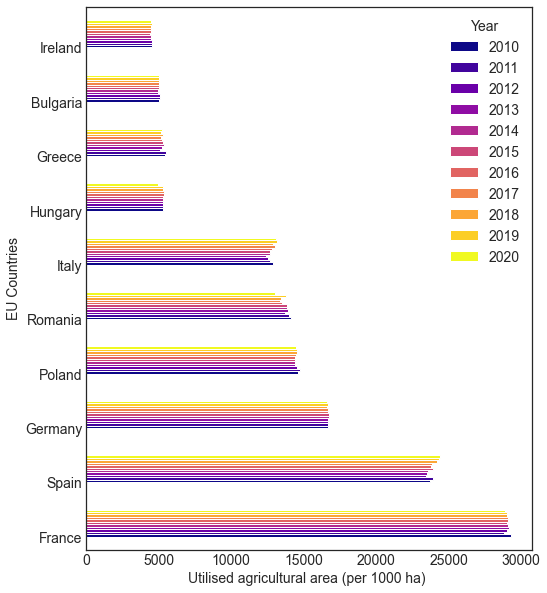

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 10))

dfEU_areas_10.plot.barh(rot=0, ax=ax, fontsize=14, position=0, color=colors)
ax.set_xlabel('Utilised agricultural area (per 1000 ha) ', fontsize=14)
ax.set_ylabel('EU Countries', fontsize=14)
ax.legend(title= 'Year', title_fontsize = 14,prop = {'size' : 14});
plt.savefig("C:/Users/Usuario/Documents/codigos/Thesis/Thesis/estadisticas_alemania/EU_areas.png", dpi=500, bbox_inches="tight")

In [41]:
cerealsT=dfEU_cereals_10.T
cerealsT.describe()

Place,France,Poland,Germany,Spain,Romania,Italy,Hungary,Bulgaria,Lithuania,Denmark
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,11.000000,12.000000,12.000000
mean,9308.507500,7567.737500,6330.391667,6094.126667,5379.412500,3203.065000,2553.188333,1880.817273,1273.180833,1424.528333
std,232.517327,198.515543,185.877587,142.480447,114.274007,190.683646,190.931874,91.439178,96.543850,49.550801
min,8904.730000,7211.300000,6063.500000,5834.970000,5195.500000,2978.390000,2337.650000,1729.270000,1064.700000,1359.590000
25%,9164.532500,7462.827500,6145.875000,6007.795000,5314.260000,3060.960000,2371.192500,1817.210000,1209.927500,1372.025000
50%,9358.775000,7498.380000,6352.500000,6051.910000,5389.375000,3143.260000,2512.605000,1903.200000,1307.750000,1434.400000
75%,9489.697500,7728.975000,6507.275000,6206.845000,5450.775000,3300.047500,2712.757500,1958.515000,1349.802500,1457.000000
max,9584.580000,7891.430000,6533.700000,6313.110000,5572.510000,3577.760000,2819.940000,2006.990000,1382.430000,1495.500000


In [42]:
areasT=dfEU_areas_10.T
areasT.describe()

Place,France,Spain,Germany,Poland,Romania,Italy,Hungary,Greece,Bulgaria,Ireland
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,29053.107273,23882.312727,16681.821818,14511.051818,13695.604545,12812.790000,5309.373636,5284.110909,5037.468182,4502.948182
std,122.106898,331.994220,40.629537,112.340092,320.961254,231.044074,103.924556,126.262443,40.845228,42.259246
min,28852.550000,23463.120000,16595.000000,14398.200000,13048.800000,12426.000000,4997.880000,5134.710000,4976.820000,4430.970000
25%,29010.495000,23645.505000,16662.450000,14417.050000,13467.295000,12665.545000,5337.625000,5183.210000,5016.450000,4471.510000
50%,29058.270000,23840.700000,16687.300000,14497.600000,13825.610000,12843.320000,5342.700000,5267.520000,5030.280000,4511.420000
75%,29101.220000,24049.525000,16712.670000,14544.950000,13881.530000,12957.250000,5346.375000,5349.215000,5049.555000,4528.220000
max,29311.030000,24434.630000,16730.700000,14780.200000,14156.480000,13150.200000,5352.280000,5532.340000,5122.980000,4568.930000


### Maize y wheat for europe union

In [43]:
fnEU_maize = 'C:/Users/Usuario/Documents/codigos/Thesis/Thesis/estadisticas_alemania/europa/EU_maize.csv' 
fnEU_wheat = 'C:/Users/Usuario/Documents/codigos/Thesis/Thesis/estadisticas_alemania/europa/EU_wheat.csv'


dfEU_maize = pd.read_csv(fnEU_maize, sep=',', index_col='Place')
dfEU_wheat = pd.read_csv(fnEU_wheat, sep=',', index_col='Place')

In [44]:
dfEU_maize=dfEU_maize.replace(-999.0,np.nan)
dfEU_wheat=dfEU_wheat.replace(-999.0,np.nan)

In [45]:
dfEU_maize=dfEU_maize.sort_values(by='2020', ascending=False)

In [46]:
dfEU_maize_10=dfEU_maize[2:12]
dfEU_maize_10

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Place,,,,,,,,,,,,
Germany,2028.80,2038.00,2003.20,2092.60,2100.40,2137.60,2095.90,2195.90,2222.70,2299.70,2219.60,2021.60
France,1417.87,1395.62,1480.64,1431.87,1491.92,1423.73,1406.01,1415.73,1438.25,1418.89,1240.84,1289.35
Poland,425.90,507.60,461.80,541.21,555.20,597.00,596.01,601.58,599.86,674.31,691.92,680.07
Italy,297.45,296.31,326.71,342.74,342.57,325.04,342.10,355.33,367.42,379.07,375.56,382.04
Czechia,186.22,205.11,233.82,237.24,244.96,234.40,223.21,224.11,232.39,226.16,216.98,212.07
Netherlands,228.74,232.00,230.00,226.00,223.86,203.81,203.51,203.22,186.23,194.65,183.30,183.54
Denmark,175.90,184.60,180.90,178.20,182.40,182.40,166.70,179.60,186.40,188.70,173.90,179.60
Belgium,173.54,170.50,177.50,178.12,173.34,168.74,171.28,179.74,175.30,181.54,183.10,177.30
Spain,96.44,107.21,107.09,112.97,107.92,106.24,107.36,107.34,116.46,115.12,118.25,108.17


In [47]:
cmap = plt.get_cmap('PuRd')
colors = cmap(np.linspace(0, 1.0, num=12))
# colors

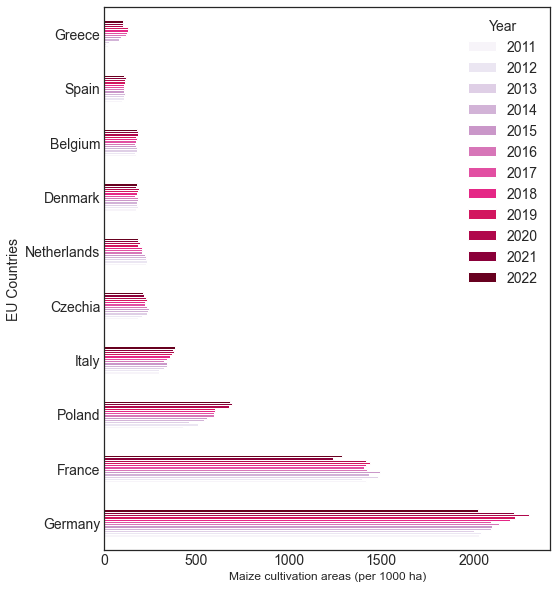

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 10))
dfEU_maize_10.plot.barh(rot=0, ax=ax, fontsize=14, position=0.5, color=colors)
ax.set_xlabel('Maize cultivation areas (per 1000 ha)', fontsize=12)
ax.set_ylabel('EU Countries', fontsize=14)
ax.legend(title= 'Year', title_fontsize = 14,prop = {'size' : 14});
plt.savefig("C:/Users/Usuario/Documents/codigos/Thesis/Thesis/estadisticas_alemania/EU_maize.png", dpi=500, bbox_inches="tight")

In [49]:
dfEU_wheat=dfEU_wheat.sort_values(by='2020', ascending=False)

In [50]:
dfEU_wheat_10=dfEU_wheat[2:12]
dfEU_wheat_10

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Place,,,,,,,,,,,,
France,35574.27,37479.86,38188.22,38538.23,42252.93,28975.44,38228.15,35424.14,40604.96,30144.11,36607.12,35073.89
Germany,22782.70,22409.30,25019.10,27784.80,26549.50,24463.80,24481.60,20263.50,23062.60,22172.10,21459.20,22719.60
Poland,9230.60,8507.51,9374.91,11493.48,10753.93,10626.45,11448.66,9637.62,10807.49,12515.06,11893.55,NaN
Spain,7957.86,5310.52,7924.91,6621.89,6627.04,8199.69,5033.04,8322.51,6041.17,8143.51,8564.63,6177.96
Italy,6545.00,7565.24,7510.13,7317.15,NaN,8236.95,7139.01,7104.65,6739.47,6716.18,7294.57,6954.55
Romania,7131.59,5297.75,7296.37,7584.81,7962.42,8431.13,10034.96,10143.67,10297.11,6392.37,10433.75,9174.67
Hungary,4082.76,3987.67,5028.89,5261.89,5331.43,5603.18,5246.26,5258.43,5377.71,5121.48,5290.14,4186.36
Czechia,4913.05,3518.90,4700.70,5442.35,5274.27,5454.66,4718.21,4417.84,4812.16,4902.41,4960.93,5298.04
Bulgaria,4588.10,4600.15,5652.17,5458.99,5140.14,5942.78,6318.08,5954.52,6319.63,4847.94,7342.99,NaN


In [51]:
cmap = plt.get_cmap('YlOrRd')
colors = cmap(np.linspace(0, 1.0, num=12))
# colors

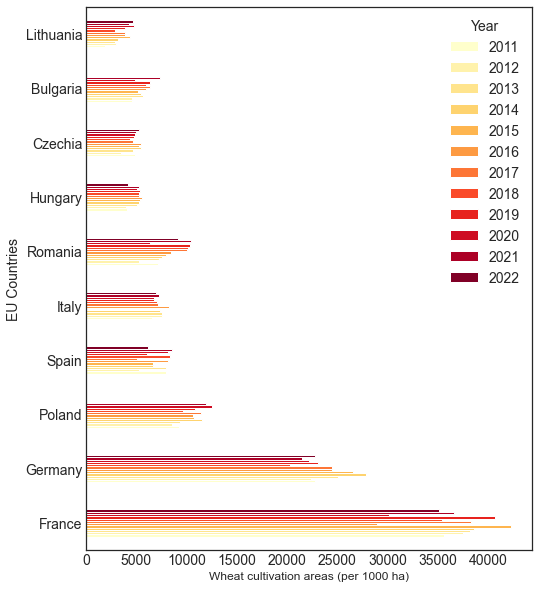

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 10))
dfEU_wheat_10.plot.barh(rot=0, ax=ax, fontsize=14, position=0.5, color=colors)
ax.set_xlabel('Wheat cultivation areas (per 1000 ha)', fontsize=12)
ax.set_ylabel('EU Countries', fontsize=14)
ax.legend(title= 'Year', title_fontsize = 14,prop = {'size' : 14});
plt.savefig("C:/Users/Usuario/Documents/codigos/Thesis/Thesis/estadisticas_alemania/EU_wheat.png", dpi=500, bbox_inches="tight")